In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('C://Users//yashh//Downloads//T2D_abundance.csv',sep = '\t')
  
X = dataset.iloc[:, 1:573].values
y = dataset.iloc[:, 573].values
X.shape

(344, 572)

In [3]:
y.shape

(344,)

In [4]:
cov_matrix = np.matmul(X.T,X)

In [5]:
from scipy.linalg import eigh

values, vectors = eigh(cov_matrix, eigvals=(570,571))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(572, 2)
(2, 572)


In [6]:
new_cord = np.matmul(vectors, X.T)
new_cord.shape

(2, 344)

In [7]:
new_cord = np.vstack((new_cord,y)).T

dataframe = pd.DataFrame(data=new_cord,columns=("1st principal", "2nd Pricipal", 'label'))
dataframe.head()

,1st principal,2nd Pricipal,label
0,-8.999404,7.756331,n
1,-12.107747,4.592556,n
2,2.867923,32.143221,n
3,-18.633201,6.153567,n
4,-5.586647,12.273927,n


C:\Users\yashh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


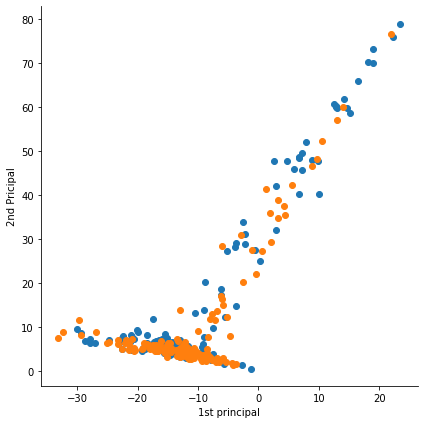

In [8]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='label', size = 6).map(plt.scatter, '1st principal', '2nd Pricipal')
plt.show()

In [9]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
PCA_data = pca.fit_transform(X)

PCA_data.shape

(344, 2)

In [10]:
PCA_data.T.shape

(2, 344)

C:\Users\yashh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


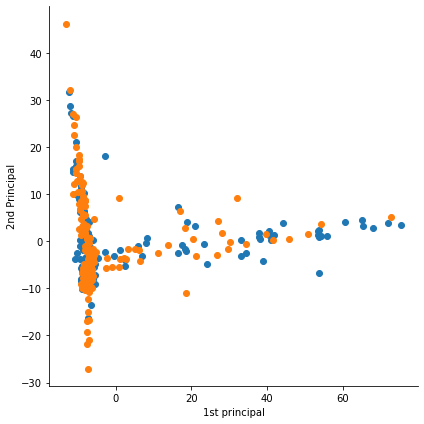

In [11]:
PCA_data = np.vstack((PCA_data.T,y)).T
pca_df = pd.DataFrame(data=PCA_data,columns=("1st principal", "2nd Principal", 'label'))
sns.FacetGrid(pca_df, hue='label', size = 6).map(plt.scatter, '1st principal', '2nd Principal')
plt.show()

In [24]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=50).fit_transform(X)

X_embedded.shape

C:\Users\yashh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(344, 2)

C:\Users\yashh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


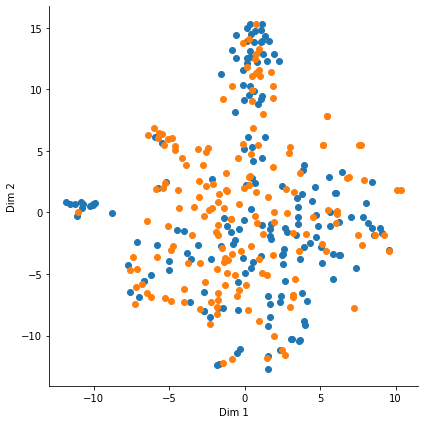

In [25]:
X_embedded = np.vstack((X_embedded.T,y)).T

tsne_df = pd.DataFrame(data = X_embedded, columns=("Dim 1", "Dim 2", "label"))

sns.FacetGrid(tsne_df, hue = "label",size =6).map(plt.scatter,'Dim 1','Dim 2')

plt.show()